# Tests on simulated LC from DiffRot paper

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

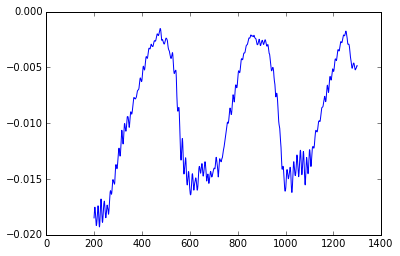

In [3]:
time, flux = np.genfromtxt('lightcurve_0012.txt').T
plt.plot(time,flux)

This case was simulated with an activity cycle lasting 1.093 yr, spot latitudes ranging from 60 deg at the start of the cylce to 32 dec at the end, and equatorial and polar rotation periods of 10.95 and 14.85 days, respectively. The high activity periods of the cycle (with higher spot coverage) correspond to lower flux (since we're not simulating faculae). 

## Try using Empirical Mode Decomposition (EMD)

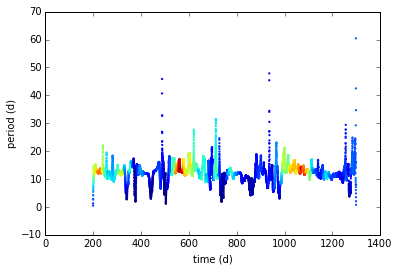

In [9]:
import emd
f = flux.copy() # copy of flux array we'll normalise
f -= f.min()
f /= f.max()
f -= 0.5
res = emd.emd(f, verbose = False, doplots = 0)
imfs = res[0]
imf1 = imfs[:,0].flatten() # the first IMF contains information about the star's rotation
freq, amp = emd.freqAmp(imf1, time)
per = 1.0/freq
plt.scatter(time[:-1], per, c = amp, s = 5, edgecolors='none')
plt.xlabel('time (d)')
plt.ylabel('period (d)')

During the high-activity periods of the cycle, the rotational signal is more pronounced (larger amplitudes = redder colours). But do we see a drift in the period that correlates with this? It's hard to tell. Let's try zooming in.

(0, 20)

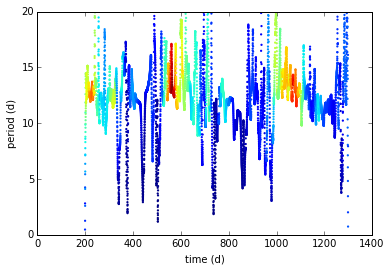

In [10]:
plt.scatter(time[:-1], per, c = amp, s = 5, edgecolors='none')
plt.xlabel('time (d)')
plt.ylabel('period (d)')
plt.ylim(0,20)

There does seem to be a downwards trend in period from start to end of each cycle. But the signal is noisy. I guess this is because the Hilbert spectrum gives an instantaneous estimate of the frequency, and what we need is a smoother estimate. So I'm going to try an apodised periodogram next.